# 시각화 미니프로젝트
### 내가 야구선수로 KBO를 간다면 어떤 팀으로 갈 것인가?   - 이재헌
##### - 내 선수 : 최고의 슬러거가 되고 싶은 신인
##### - 슬러거의 고려 스탯
- 홈런수
- ISO(순수장타율)
- wRC+(조정득점창출력 : 타자가 득점에 얼마나 기여했는지 나타내는 지표)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [2]:
df_hr = pd.read_excel('2025_KBO_top30_HR.xlsx')
df_hr

,순위,선수명,팀명,홈런
0,1,디아즈,삼성,50
1,2,데이비슨,NC,36
2,3,위즈덤,KIA,35
3,4,노시환,한화,32
4,5,오스틴,LG,31
5,6,송성문,키움,26
6,7,최형우,KIA,24
7,8,문보경,LG,24
8,9,최정,SSG,23
9,10,김영웅,삼성,22


In [3]:
df_iso = pd.read_excel('2025_KBO_top30_ISO.xlsx')
color_dict = {
    '두산': '#7F7F7F',
    'KT': '#3A923A',
    '삼성': '#3274A1',
    '롯데': '#2EABB8',
    '한화': '#E1812C',
    '키움':'#845B53',
    'LG':'#C03D3E',
    'KIA':'#D684BD',
    'NC':'#A9AA35',
    'SSG':'#9372B2'}
df_iso

,순위,선수명,팀명,ISO
0,1,디아즈,삼성,0.330
1,2,위즈덤,KIA,0.300
2,3,오스틴,LG,0.282
3,4,노시환,한화,0.237
4,5,안현민,KT,0.235
5,6,최형우,KIA,0.222
6,7,송성문,키움,0.214
7,8,김영웅,삼성,0.206
8,9,박동원,LG,0.202
9,10,구자욱,삼성,0.197


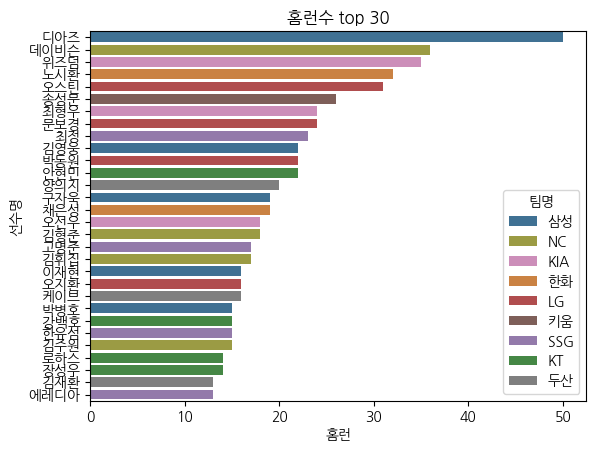

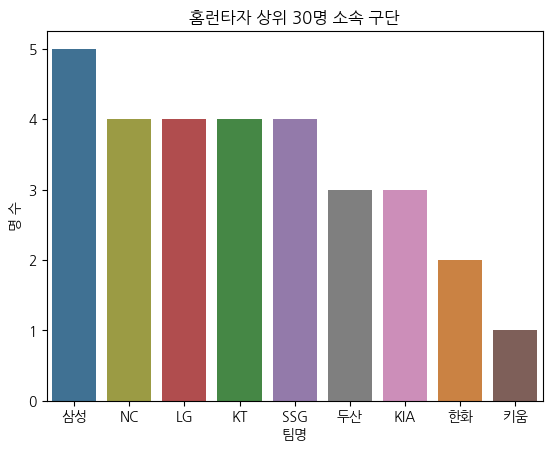

In [4]:
sns.barplot(data=df_hr, x='홈런', y='선수명', hue='팀명', palette=color_dict)
plt.title('홈런수 top 30')
plt.show()

df_hr_team = df_hr['팀명'].value_counts().reset_index()
df_hr_team.columns = ['팀명', '명 수']
sns.barplot(data=df_hr_team, x='팀명', y='명 수', hue='팀명', palette=color_dict)
plt.title('홈런타자 상위 30명 소속 구단')
plt.show()

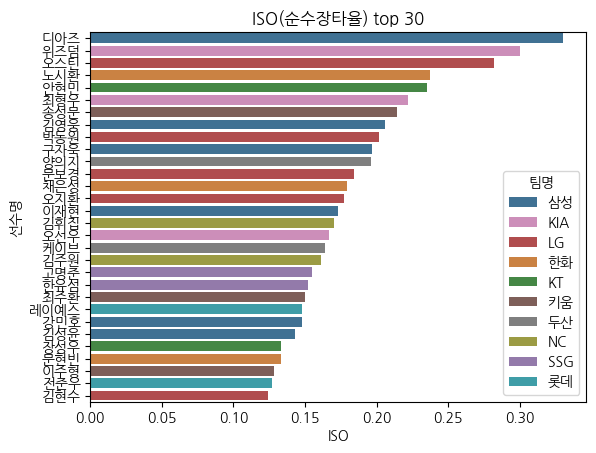

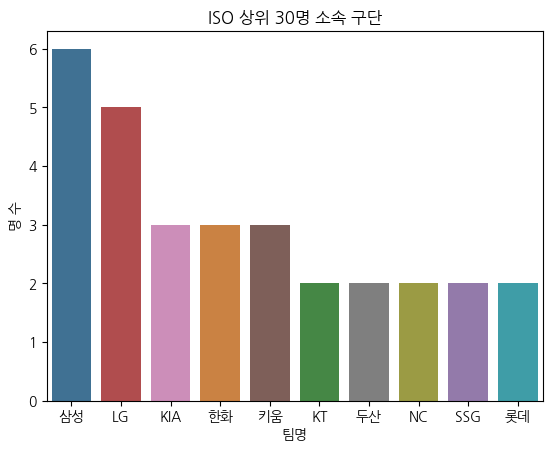

In [5]:
sns.barplot(data=df_iso, x='ISO', y='선수명', hue='팀명', palette=color_dict)
plt.title('ISO(순수장타율) top 30')
plt.show()

df_iso_team = df_iso['팀명'].value_counts().reset_index()
df_iso_team.columns = ['팀명', '명 수']
sns.barplot(data=df_iso_team, x='팀명', y='명 수', hue='팀명', palette=color_dict)
plt.title('ISO 상위 30명 소속 구단')
plt.show()

In [6]:
df_wrc = pd.read_csv('kbo_batting_stats_fixed.csv')
# 일반적인 wRC+ 수치는 평균을 100이다.
# 160대는 Excellent, 140대는 Great, 115는 Abobe Average, 100은 Average, 80은 Below Average, 75는 Poor, 60은 Awful이다.
# PA(타석) 300타석 이상 기준을 잡는 이유는 이 조건이 없으면 wRC+ 수치가 1000이 넘는 선수(한화 이승현)부터 200이 넘는 선수들이 너무 많아지기 때문이다.
# 그러므로 규정타석(446타석)을 충족한 450타석이 넘는 선수를 조건으로 둔다.
df_wrc_2025 = df_wrc[(df_wrc['Year'] == 2025) & (df_wrc['PA'] >= 450)]
df_wrc_2025_top30 = df_wrc_2025.sort_values(by='wRC+', ascending=False).head(30).reset_index()
df_wrc30 = df_wrc_2025_top30[['Name', 'Team', 'wRC+']]
df_wrc30

,Name,Team,wRC+
0,안현민,KT,182.7
1,오스틴,LG,171.6
2,송성문,키움,164.1
3,양의지,두산,162.8
4,디아즈,삼성,159.7
5,최형우,KIA,157.6
6,김성윤,삼성,146.2
7,구자욱,삼성,143.6
8,문보경,LG,135.5
9,김현수,LG,133.1


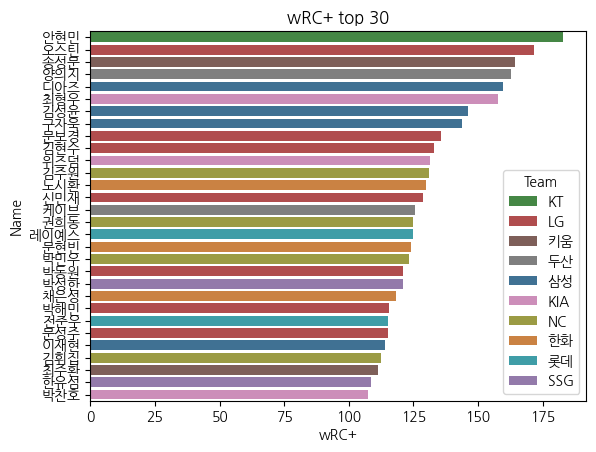

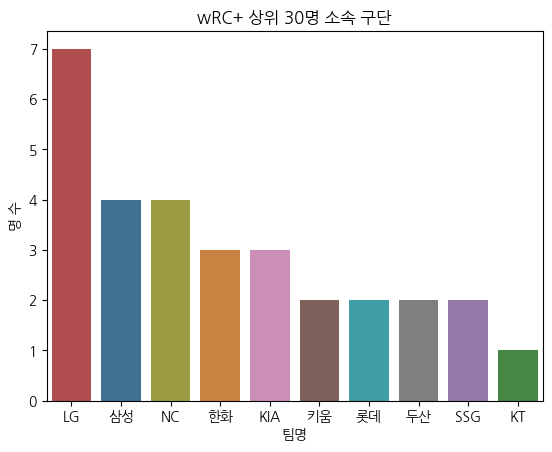

In [7]:
sns.barplot(data=df_wrc30, x='wRC+', y='Name', hue='Team', palette=color_dict)
plt.title('wRC+ top 30')
plt.show()

df_wrc_team = df_wrc30['Team'].value_counts().reset_index()
df_wrc_team.columns = ['팀명', '명 수']
sns.barplot(data=df_wrc_team, x='팀명', y='명 수', hue='팀명', palette=color_dict)
plt.title('wRC+ 상위 30명 소속 구단')
plt.show()

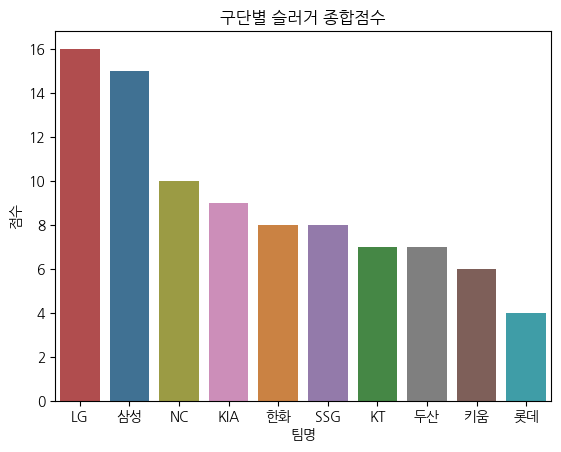

In [8]:
# 슬러거 종합점수 그래프
df_total = pd.concat([df_hr_team, df_iso_team, df_wrc_team])
df_total = df_total.groupby('팀명')['명 수'].sum().reset_index().sort_values(by='명 수', ascending=False)

sns.barplot(data=df_total, x='팀명', y='명 수', hue='팀명', palette=color_dict)
plt.title('구단별 슬러거 종합점수')
plt.ylabel('점수')
plt.show()